In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Camera Calibration

## Start with Chessboard

Good


True

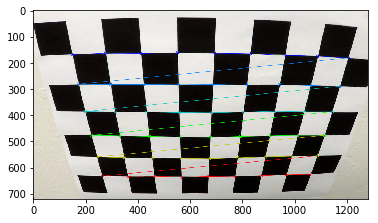

In [2]:
#The number of inside corners in x
nx = 9
#The number of inside corners in y
ny = 6
#Cali process
cali_test = cv2.imread('/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/camera_cal/calibration2.jpg')
cali_test = cv2.cvtColor(cali_test,cv2.COLOR_BGR2RGB)
cali_gray = cv2.cvtColor(cali_test, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(cali_gray, (nx, ny), None)
if ret == True:
    print('Good')
    cali_corners = cv2.drawChessboardCorners(cali_test, (nx, ny), corners, ret)
    plt.imshow(cali_corners)
cv2.imwrite("/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/output_images/1_find_corners.jpg", cali_corners)

## Measure the distort

Ready for calibration


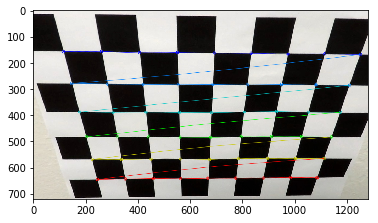

True

In [3]:
objpoints = []
imgpoints = []

objp = np.zeros((9*6,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    print('Ready for calibration')

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, cali_gray.shape[::-1], None, None)
undist = cv2.undistort(cali_test, mtx, dist, None, mtx)
plt.imshow(undist)
plt.show()
cv2.imwrite("/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/output_images/2_undistort_chessboard.jpg", undist)

## Transform Perspective

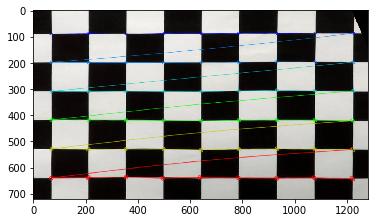

True

In [4]:
offset = 100
img_size = (cali_gray.shape[1],cali_gray.shape[0])
src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
warped = cv2.warpPerspective(undist, M, img_size)
plt.imshow(warped)
plt.show()
cv2.imwrite("/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/output_images/3_transform_perspective_chessboard.jpg", warped)

# Pipeline

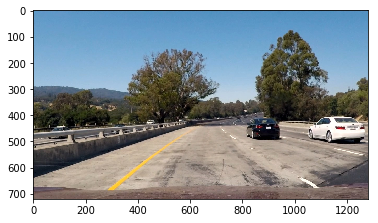

True

In [5]:
img = mpimg.imread('/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/test_images/test1.jpg')
plt.imshow(img)
plt.show()
cv2.imwrite("/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/output_images/4_original_img.jpg", img)

### Calibration

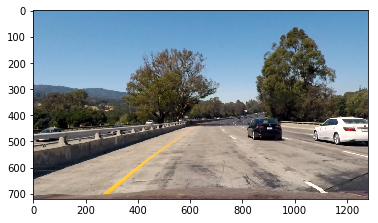

True

In [6]:
## Undistort
def undistort(img):
    undist_image = cv2.undistort(img, mtx, dist, None, mtx)
    return undist_image

undist_image = undistort(img)
plt.imshow(undist_image)
plt.show()
cv2.imwrite("/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/output_images/5_undist_img.jpg", undist_image)

### Gray Mask

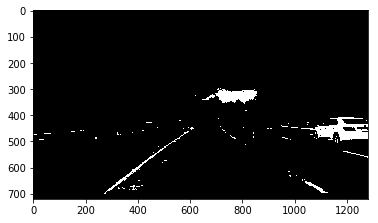

True

In [7]:
## The thresh was adjusted gradually untill I find the most satisfied match
def gray_mask(img):
    thresh = (200, 255)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    binary = np.zeros_like(gray)
    binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1
    return binary
    
binary = gray_mask(undist_image)
plt.imshow(binary,cmap='gray')
plt.show()
###"*255" is for save image only,otherwise I just get a complete dark image
cv2.imwrite("/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/output_images/6_gray_mask.jpg", binary*255)

### Gradient Mask(Don't seem to work very good ,won't use it later)

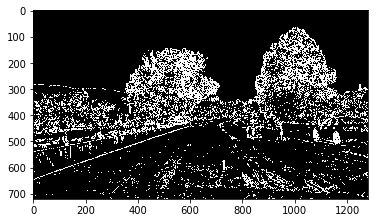

True

In [8]:
def gradient_mask(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    thresh_min = 10
    thresh_max = 300
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return sxbinary

sxbinary = gradient_mask(undist_image)
plt.imshow(sxbinary,cmap='gray')
plt.show()
cv2.imwrite("/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/output_images/7_gradient_mask.jpg", sxbinary*255)

### Saturation Mash

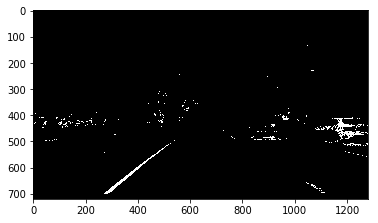

True

In [9]:
def saturation_mask(img):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    s_thresh_min = 230
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1
    return s_binary

s_binary=saturation_mask(undist_image)
plt.imshow(s_binary,cmap='gray')
plt.show()

cv2.imwrite("/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/output_images/8_saturation_mask.jpg", s_binary*255)

### Stack Effect

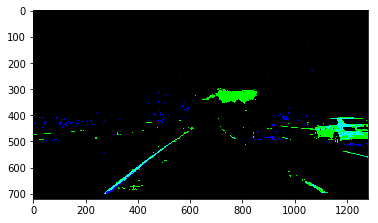

True

In [10]:
stack_binary = np.dstack(( np.zeros_like(binary), binary, s_binary)) *255
plt.imshow(stack_binary)
plt.show()
cv2.imwrite("/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/output_images/9_stack_effect.jpg", stack_binary)

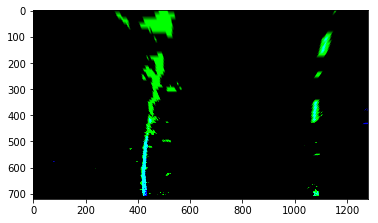

True

In [11]:
## Set src points
def perspective_transform(img):
    src1=np.array([[270, 680]], dtype=np.float32)
    src2=np.array([[1040, 680]], dtype=np.float32)
    src3=np.array([[590, 450]], dtype=np.float32)
    src4=np.array([[700, 450]], dtype=np.float32)


## set dst points
    dst1=np.array([[400, 700]], dtype=np.float32)
    dst2=np.array([[1040, 700]], dtype=np.float32)
    dst3=np.array([[400, 0]], dtype=np.float32)
    dst4=np.array([[1040, 0]], dtype=np.float32)


## Transform Perspective
    src = np.float32([src1,src2, src3,src4])
    dst = np.float32([dst1,dst2,dst3,dst4])
    M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(img, M, img_size)
    return warped

warped = perspective_transform(stack_binary)
plt.imshow(warped)
plt.show()
cv2.imwrite("/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/output_images/10_bird's_eye.jpg", warped)

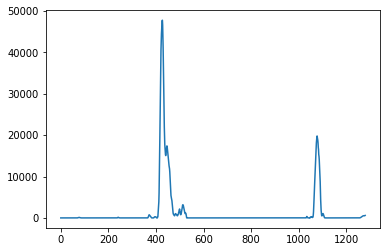

In [12]:
import numpy as np
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
histogram = np.sum(warped[warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)
plt.savefig("/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/output_images/11_histogram.jpg")

In [13]:
histogram = np.sum(warped[warped.shape[0]//2:,:], axis=0)

out_img = np.dstack((warped, warped, warped))*255

midpoint = np.int(histogram.shape[0]//2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint


# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(warped.shape[0]//nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = warped.shape[0] - (window+1)*window_height
    win_y_high = warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
    (0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
    (0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

True

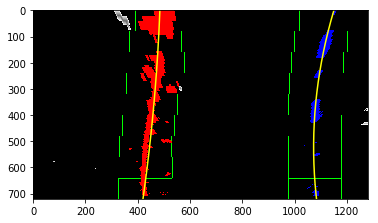

In [14]:
ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
cv2.imwrite("/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/output_images/12_windows.jpg", out_img)

In [15]:
nonzero = warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
left_fit[1]*nonzeroy + left_fit[2] + margin))) 

right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

True

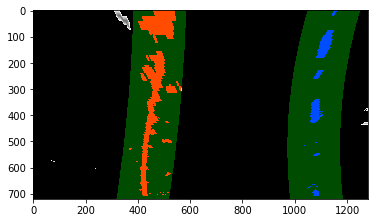

In [16]:
out_img = np.dstack((warped, warped, warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
#plt.plot(left_fitx, ploty, color='yellow')
#plt.plot(right_fitx, ploty, color='yellow')
#plt.xlim(0, 1280)
#plt.ylim(720, 0)
cv2.imwrite("/Users/simon/Desktop/udacity_ca/CarND-Advanced-Lane-Lines/output_images/13_shadow_road.jpg", result)

In [17]:
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)

6121.73966772146 1799.2876839474707


In [18]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')

1944.9019403892983 m 580.3742488360942 m


True

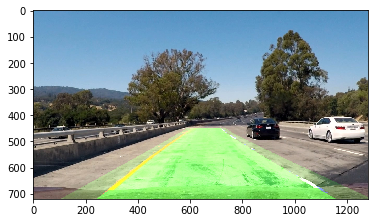

In [19]:
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(result, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
src1=np.array([[270, 680]], dtype=np.float32)
src2=np.array([[1040, 680]], dtype=np.float32)
src3=np.array([[590, 450]], dtype=np.float32)
src4=np.array([[700, 450]], dtype=np.float32)


## set dst points
dst1=np.array([[400, 700]], dtype=np.float32)
dst2=np.array([[1040, 700]], dtype=np.float32)
dst3=np.array([[400, 0]], dtype=np.float32)
dst4=np.array([[1040, 0]], dtype=np.float32)

src = np.float32([src1,src2, src3,src4])
dst = np.float32([dst1,dst2,dst3,dst4])

Minv = cv2.getPerspectiveTransform(dst, src)
newwarp = cv2.warpPerspective(result, Minv, (img_size[0], img_size[1])) 

newwarp = np.uint8(newwarp)

# Combine the result with the original image
final = cv2.addWeighted(img, 1, newwarp, 0.5, 0)
plt.imshow(final)
cv2.imwrite('output_images/14_final_result.jpg', final)

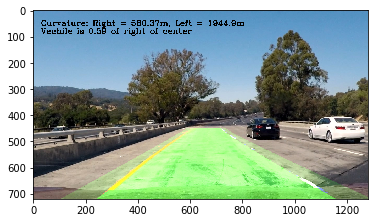

In [20]:
left_intcpt = left_fit[0]*img_size[1]**2 + left_fit[1]*img_size[1] + left_fit[2]

# right line intercept on x axis
right_intcpt = right_fit[0]*img_size[1]**2 + right_fit[1]*img_size[1] + right_fit[2]

lane_mid = (left_intcpt + right_intcpt)/2.0

off_center = (lane_mid - img_size[0]/2.0)*xm_per_pix

def display_on_frame(image, left_curverad, right_curverad, off_center):

    font = cv2.FONT_HERSHEY_COMPLEX
    curve_disp_txt = 'Curvature: Right = ' + str(np.round(right_curverad,2)) + 'm, Left = ' + str(np.round(left_curverad,2)) + 'm' 
    if off_center > 0:
        off_disp_txt = 'Vechile is ' + str(np.round(off_center,2)) + ' of right of center'
    else:
        off_disp_txt = 'Vechile is ' + str(np.round(coff_center,2)) + ' of left of center'

    cv2.putText(final, curve_disp_txt, (30, 60), font, 1, (0,0,0), 2)
    cv2.putText(final, off_disp_txt, (30, 90), font, 1, (0,0,0), 2)
    
    return image

final = display_on_frame(final, left_curverad=left_curverad, right_curverad=right_curverad,off_center=off_center)
plt.imshow(final)

In [21]:
def process(image):
    img = undistort(image)
    img_size = (img.shape[1], img.shape[0])
    binary = gray_mask(img)
    s_binary=saturation_mask(img)
    stack=np.zeros_like(img)
    stack_binary = np.dstack(( np.zeros_like(binary), binary, s_binary)) *255
    
    src1=np.array([[270, 680]], dtype=np.float32)
    src2=np.array([[1040, 680]], dtype=np.float32)
    src3=np.array([[590, 450]], dtype=np.float32)
    src4=np.array([[700, 450]], dtype=np.float32)

## set dst points
    dst1=np.array([[400, 700]], dtype=np.float32)
    dst2=np.array([[1040, 700]], dtype=np.float32)
    dst3=np.array([[400, 0]], dtype=np.float32)
    dst4=np.array([[1040, 0]], dtype=np.float32)

## Transform Perspective
    src = np.float32([src1,src2, src3,src4])
    dst = np.float32([dst1,dst2,dst3,dst4])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(stack_binary, M, img_size, flags=cv2.INTER_LINEAR)

    margin = 100
    global left_fit, right_fit, left_poly_list, right_poly_list,final
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    histogram = np.sum(warped[warped.shape[0]//2:,:], axis=0)

    out_img = np.dstack((warped, warped, warped))*255

    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint


    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = warped.shape[0] - (window+1)*window_height
        win_y_high = warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    nonzero = warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        
    out_img = np.dstack((warped, warped, warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
        
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(result, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    src1=np.array([[270, 680]], dtype=np.float32)
    src2=np.array([[1040, 680]], dtype=np.float32)
    src3=np.array([[590, 450]], dtype=np.float32)
    src4=np.array([[700, 450]], dtype=np.float32)


    ## set dst points
    dst1=np.array([[400, 700]], dtype=np.float32)
    dst2=np.array([[1040, 700]], dtype=np.float32)
    dst3=np.array([[400, 0]], dtype=np.float32)
    dst4=np.array([[1040, 0]], dtype=np.float32)

    src = np.float32([src1,src2, src3,src4])
    dst = np.float32([dst1,dst2,dst3,dst4])

    Minv = cv2.getPerspectiveTransform(dst, src)
    newwarp = cv2.warpPerspective(result, Minv, (img_size[0], img_size[1])) 

    newwarp = np.uint8(newwarp)

    # Combine the result with the original image
    final = cv2.addWeighted(img, 1, newwarp, 0.5, 0)
        
    left_intcpt = left_fit[0]*img_size[1]**2 + left_fit[1]*img_size[1] + left_fit[2]

    # right line intercept on x axis
    right_intcpt = right_fit[0]*img_size[1]**2 + right_fit[1]*img_size[1] + right_fit[2]

    lane_mid = (left_intcpt + right_intcpt)/2.0

    off_center = (lane_mid - img_size[0]/2.0)*xm_per_pix

    font = cv2.FONT_HERSHEY_COMPLEX
    curve_disp_txt = 'Curvature: Right = ' + str(np.round(right_curverad,2)) + 'm, Left = ' + str(np.round(left_curverad,2)) + 'm' 
    if off_center > 0:
        off_disp_txt = 'Vechile is ' + str(np.round(off_center,2)) + ' of right of center'
    else:
        off_disp_txt = 'Vechile is ' + str(np.round(off_center,2)) + ' of left of center'

    cv2.putText(final, curve_disp_txt, (30, 60), font, 1, (0,0,0), 2)
    cv2.putText(final, off_disp_txt, (30, 90), font, 1, (0,0,0), 2)
        
    return final

In [22]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
project_output = 'project_output.mp4'
clip1 = VideoFileClip('project_video.mp4')
left_fit, right_fit = None, None
project_clip = clip1.fl_image(process)
%time project_clip.write_videofile(project_output, audio=False)

[MoviePy] >>>> Building video project_output.mp4
[MoviePy] Writing video project_output.mp4


100%|█████████▉| 1260/1261 [01:48<00:00, 11.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_output.mp4 

CPU times: user 3min 3s, sys: 10.1 s, total: 3min 13s
Wall time: 1min 49s
